In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("bulk1_consumption_data.csv")

In [3]:
df.head()

,timestamp,bulk_consumption,1_building,2_building,3_building,4_building,5_building,6_building,7_building,leakage
0,01-01-2020 00:00,70.208,5.84375,6.870,0.853,12.081,2.456,4.66926,60.2500,0
1,01-01-2020 01:00,97.712,7.53125,9.625,0.841,15.298,3.453,5.78163,80.2500,0
2,01-01-2020 02:00,92.368,7.53125,9.179,0.873,16.369,3.138,5.85975,80.3125,0
3,01-01-2020 03:00,110.272,8.06250,9.133,1.130,14.006,2.753,5.46913,80.3125,0
4,01-01-2020 04:00,108.160,7.62500,9.086,1.289,17.392,2.762,5.60976,80.3125,0


## Data Analysis

In [4]:
df.describe()

,bulk_consumption,1_building,2_building,3_building,4_building,5_building,6_building,7_building,leakage
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,92.564708,24.918957,8.834542,2.439097,28.276028,3.971572,28.714524,28.665416,0.551685
std,53.895410,24.330071,4.196667,1.303658,18.926931,2.980003,26.491042,30.105812,0.497350
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.816000,8.337813,6.566000,1.560000,16.071500,1.721000,11.015000,0.000000,0.000000
50%,102.800000,14.312500,7.939000,2.098000,19.378000,3.357500,16.043250,32.407475,1.000000
75%,115.888000,36.252375,9.223750,2.854250,36.826500,5.244250,40.744250,53.000000,1.000000
max,385.984000,144.614250,25.482000,8.976000,86.069000,15.839000,119.330250,101.820320,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         8784 non-null   object 
 1   bulk_consumption  8784 non-null   float64
 2   1_building        8784 non-null   float64
 3   2_building        8784 non-null   float64
 4   3_building        8784 non-null   float64
 5   4_building        8784 non-null   float64
 6   5_building        8784 non-null   float64
 7   6_building        8784 non-null   float64
 8   7_building        8784 non-null   float64
 9   leakage           8784 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 686.4+ KB


In [6]:
df["leakage"].unique()

array([0, 1], dtype=int64)

In [7]:
df["leakage"].value_counts()

leakage
1    4846
0    3938
Name: count, dtype: int64

## EDA

<Axes: xlabel='leakage', ylabel='count'>

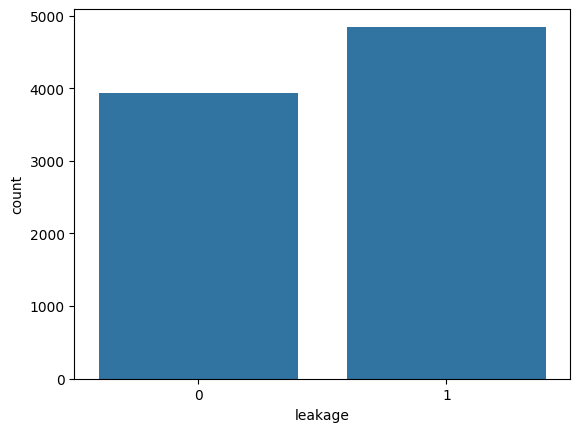

In [8]:
sns.countplot(x="leakage",data=df)

<Axes: xlabel='1_building', ylabel='bulk_consumption'>

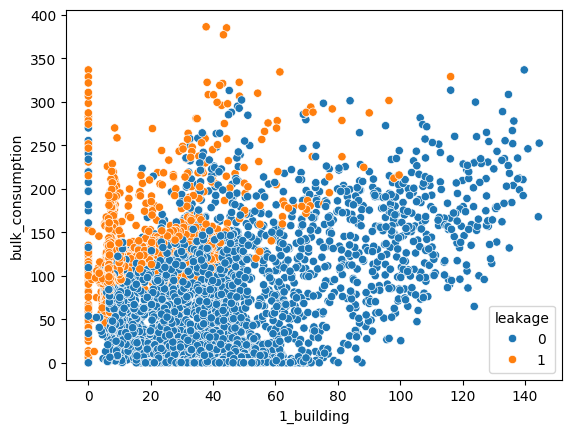

In [9]:
sns.scatterplot(x="1_building",y="bulk_consumption",data=df,hue="leakage")

<Axes: xlabel='2_building', ylabel='bulk_consumption'>

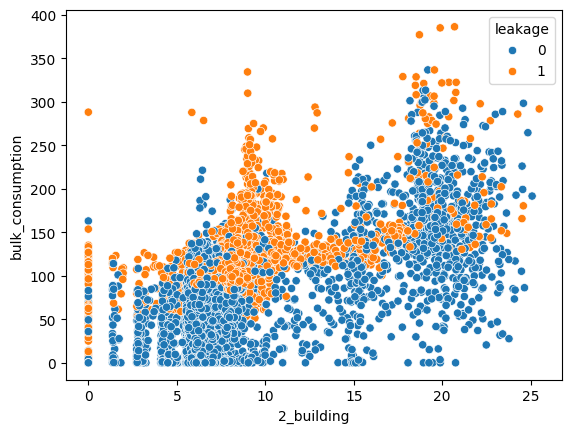

In [10]:
sns.scatterplot(x="2_building",y="bulk_consumption",data=df,hue="leakage")

<Axes: xlabel='3_building', ylabel='bulk_consumption'>

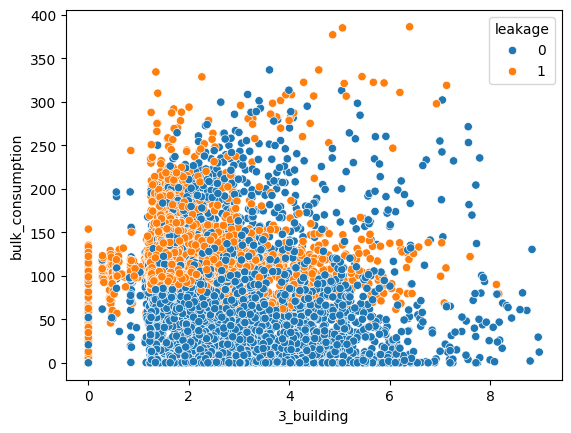

In [11]:
sns.scatterplot(x="3_building",y="bulk_consumption",data=df,hue="leakage")

<Axes: xlabel='4_building', ylabel='bulk_consumption'>

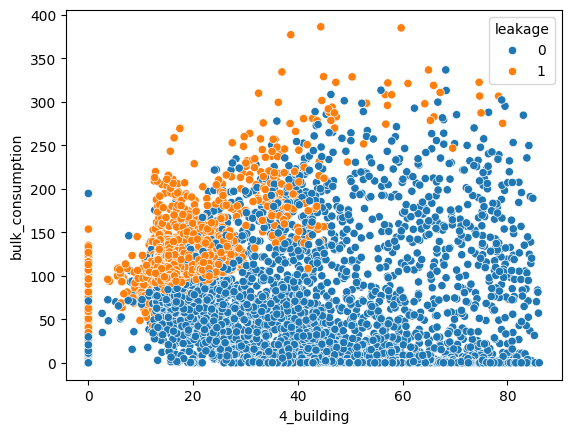

In [12]:
sns.scatterplot(x="4_building",y="bulk_consumption",data=df,hue="leakage")

<Axes: xlabel='5_building', ylabel='bulk_consumption'>

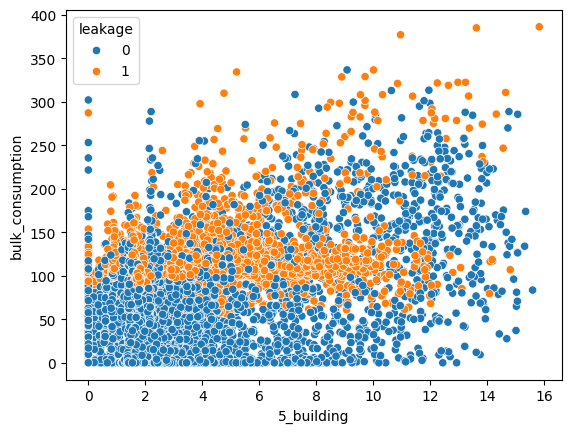

In [13]:
sns.scatterplot(x="5_building",y="bulk_consumption",data=df,hue="leakage")

<Axes: xlabel='6_building', ylabel='bulk_consumption'>

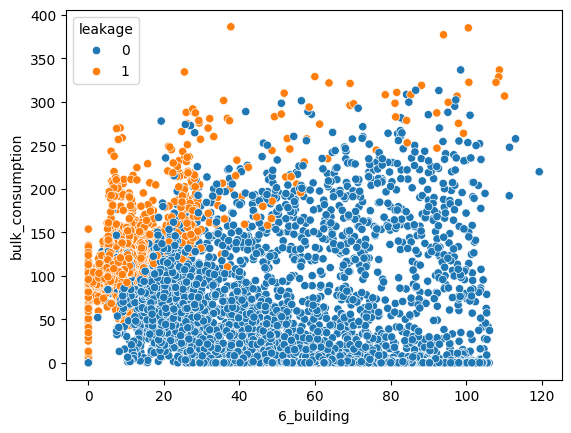

In [14]:
sns.scatterplot(x="6_building",y="bulk_consumption",data=df,hue="leakage")

<Axes: xlabel='7_building', ylabel='bulk_consumption'>

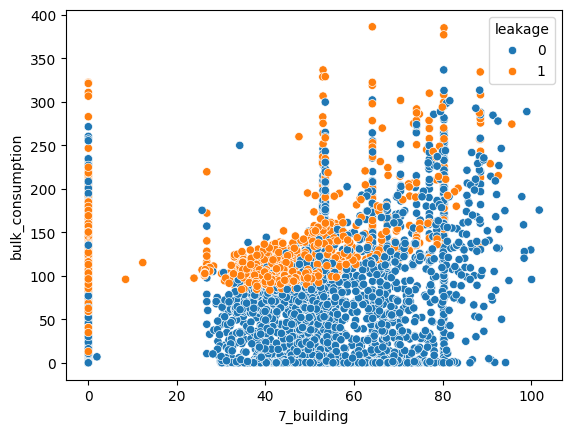

In [15]:
sns.scatterplot(x="7_building",y="bulk_consumption",data=df,hue="leakage")

<Axes: xlabel='leakage', ylabel='bulk_consumption'>

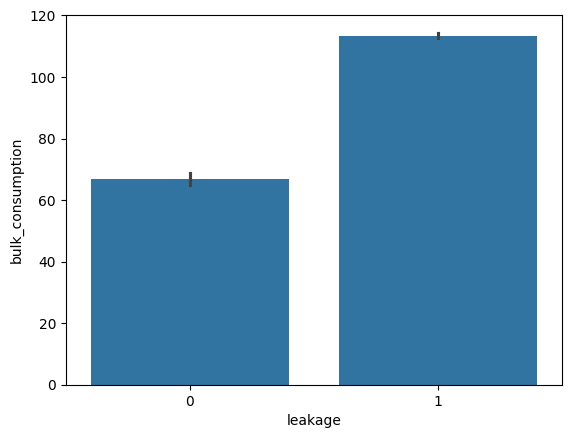

In [16]:
sns.barplot(x="leakage",y="bulk_consumption",data=df)

## Data preprocessing

### checking for null values

In [17]:
df.isnull().sum()

timestamp           0
bulk_consumption    0
1_building          0
2_building          0
3_building          0
4_building          0
5_building          0
6_building          0
7_building          0
leakage             0
dtype: int64

In [18]:
# there is no null values

### CHeck for outliers

#### 1_building

<Axes: xlabel='1_building', ylabel='Count'>

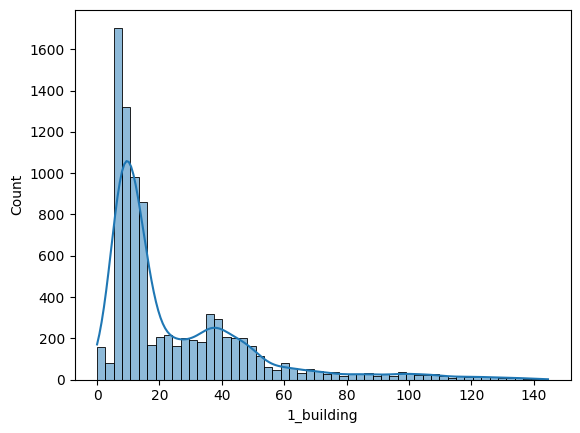

In [19]:
sns.histplot(x="1_building",kde=True,data=df)

In [20]:
q1=np.quantile(df["1_building"],0.25)
q3=np.quantile(df["1_building"],0.75)
iqr=q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [21]:
upper_bound,lower_bound

(78.12421875000001, -33.534031250000005)

In [22]:
df[(df["1_building"] < lower_bound) | (df["1_building"] > upper_bound)]


,timestamp,bulk_consumption,1_building,2_building,3_building,4_building,5_building,6_building,7_building,leakage
55,03-01-2020 07:00,190.960,83.06100,9.271,0.561,37.679,2.900,57.02200,80.31250,0
58,03-01-2020 10:00,132.576,88.98475,18.299,1.440,44.096,4.411,44.78688,80.31250,0
59,03-01-2020 11:00,145.152,82.02075,18.722,1.627,48.707,3.800,56.28700,80.31250,0
60,03-01-2020 12:00,146.016,120.49825,18.529,1.930,64.492,7.077,75.89750,80.31250,0
61,03-01-2020 13:00,211.536,127.57175,20.046,2.210,75.618,6.447,91.39124,80.25000,0
...,...,...,...,...,...,...,...,...,...,...
8463,18-12-2020 15:00,54.944,89.10500,18.362,2.431,62.201,6.344,85.08600,68.50000,0
8464,18-12-2020 16:00,80.608,89.08250,18.347,2.228,71.798,2.874,72.35700,65.75782,0
8533,21-12-2020 13:00,112.288,84.53500,14.885,2.108,67.897,4.706,67.50300,67.03126,0
8534,21-12-2020 14:00,190.688,95.32200,17.786,2.252,64.986,6.673,64.86100,75.35939,0


<Axes: xlabel='1_building'>

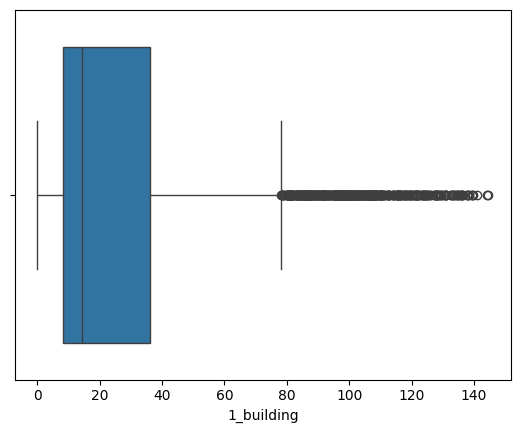

In [23]:
sns.boxplot(x="1_building",data=df)

##### energy consumption for 100 kwh for a building is possible.so values are okay.we donot want to change the outliers

## 2_building

<Axes: xlabel='2_building', ylabel='Count'>

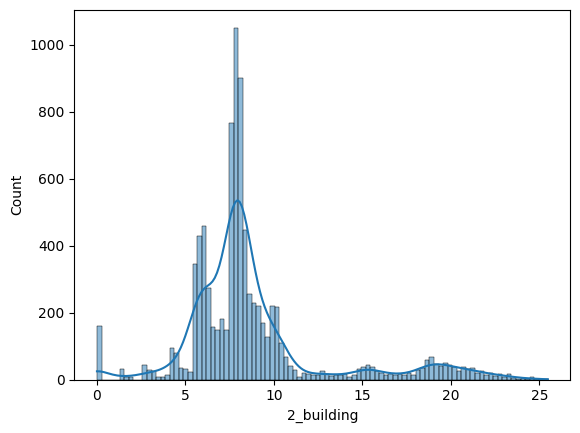

In [24]:
sns.histplot(x="2_building",kde=True,data=df)

In [25]:
q1=np.quantile(df["2_building"],0.25)
q3=np.quantile(df["2_building"],0.75)
iqr=q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
lower_bound,upper_bound

(2.5793749999999984, 13.210375000000003)

In [26]:
df[(df["2_building"] < lower_bound) | (df["2_building"] > upper_bound)]


,timestamp,bulk_consumption,1_building,2_building,3_building,4_building,5_building,6_building,7_building,leakage
10,01-01-2020 10:00,0.000,41.5220,18.066,2.363,68.433,4.493,79.82800,80.31250,0
11,01-01-2020 11:00,0.000,48.3110,18.937,1.752,79.537,5.588,94.07300,80.31250,0
12,01-01-2020 12:00,0.000,51.4860,19.462,1.943,84.813,5.274,101.92800,80.31250,0
13,01-01-2020 13:00,0.000,51.5770,19.886,2.163,63.506,6.156,103.48700,80.31250,0
14,01-01-2020 14:00,15.968,52.1960,19.776,2.514,21.395,6.679,104.69400,80.25000,0
...,...,...,...,...,...,...,...,...,...,...
8551,22-12-2020 07:00,86.528,14.5885,13.963,1.935,37.216,2.847,17.52600,49.76564,0
8559,22-12-2020 15:00,64.608,60.4505,18.079,2.203,54.118,4.928,46.85900,53.60938,0
8560,22-12-2020 16:00,97.728,50.2935,18.560,2.191,57.238,4.488,53.40000,68.39064,0
8561,22-12-2020 17:00,82.112,51.0170,17.781,1.455,46.467,4.118,39.41225,60.40626,0


<Axes: xlabel='2_building'>

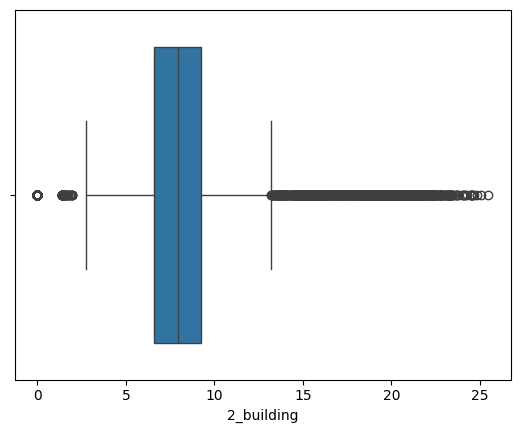

In [27]:
sns.boxplot(x="2_building",data=df)

## 3_building

<Axes: xlabel='3_building', ylabel='Count'>

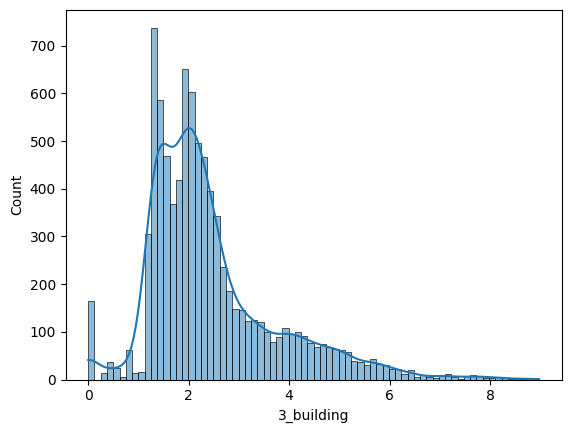

In [28]:
sns.histplot(x="3_building",kde=True,data=df)

In [29]:
q1=np.quantile(df["3_building"],0.25)
q3=np.quantile(df["3_building"],0.75)
iqr=q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
lower_bound,upper_bound

(-0.3813749999999998, 4.795624999999999)

In [30]:
df[(df["3_building"] < lower_bound) | (df["3_building"] > upper_bound)]

,timestamp,bulk_consumption,1_building,2_building,3_building,4_building,5_building,6_building,7_building,leakage
85,04-01-2020 13:00,32.384,66.16825,8.600,4.864,47.279,7.949,78.29987,80.31250,0
86,04-01-2020 14:00,116.512,72.17800,8.654,6.072,67.784,8.311,85.72950,80.25000,0
87,04-01-2020 15:00,40.880,49.40925,8.591,5.674,34.894,8.465,35.14200,80.31250,0
88,04-01-2020 16:00,26.512,40.05825,8.714,5.345,29.154,8.316,34.56025,80.25000,0
230,10-01-2020 14:00,312.800,45.19500,18.913,5.043,68.299,10.645,92.76400,80.31250,0
...,...,...,...,...,...,...,...,...,...,...
8438,17-12-2020 14:00,131.904,135.00400,20.326,6.417,79.641,2.137,92.58700,92.23438,0
8439,17-12-2020 15:00,226.592,134.66300,20.552,6.658,73.596,2.447,86.30675,92.71093,0
8440,17-12-2020 16:00,193.248,97.12000,20.828,6.293,51.857,2.543,47.27450,92.19531,0
8442,17-12-2020 18:00,172.384,81.48550,19.731,4.939,30.161,1.402,29.13050,71.04688,0


<Axes: xlabel='3_building'>

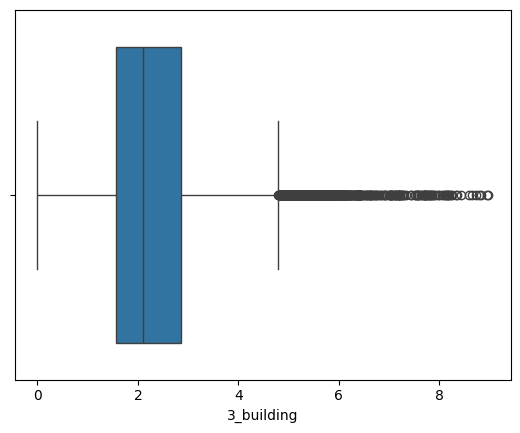

In [31]:
sns.boxplot(x="3_building",data=df)

## 4_building

<Axes: xlabel='4_building', ylabel='Count'>

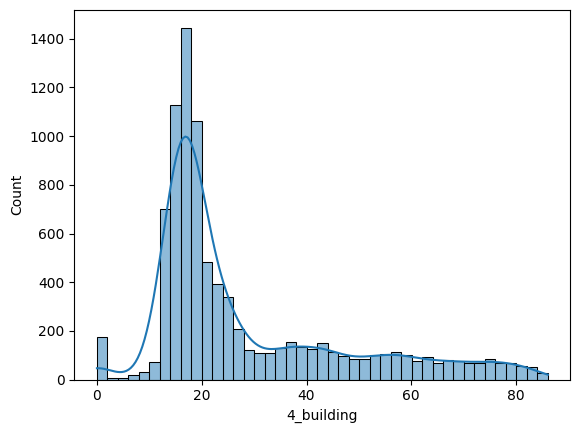

In [32]:
sns.histplot(x="4_building",kde=True,data=df)

In [33]:
q1=np.quantile(df["4_building"],0.25)
q3=np.quantile(df["4_building"],0.75)
iqr=q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
lower_bound,upper_bound

(-15.061000000000003, 67.959)

In [34]:
df[(df["4_building"] < lower_bound) | (df["4_building"] > upper_bound)]

,timestamp,bulk_consumption,1_building,2_building,3_building,4_building,5_building,6_building,7_building,leakage
10,01-01-2020 10:00,0.000,41.52200,18.066,2.363,68.433,4.493,79.82800,80.31250,0
11,01-01-2020 11:00,0.000,48.31100,18.937,1.752,79.537,5.588,94.07300,80.31250,0
12,01-01-2020 12:00,0.000,51.48600,19.462,1.943,84.813,5.274,101.92800,80.31250,0
15,01-01-2020 15:00,3.552,46.08425,19.878,2.605,71.125,6.839,91.14075,80.31250,0
36,02-01-2020 12:00,138.352,42.55625,18.824,1.815,71.227,5.268,83.11200,80.31250,0
...,...,...,...,...,...,...,...,...,...,...
8748,30-12-2020 12:00,1.342,45.16400,6.337,1.931,71.191,1.408,83.23400,73.62500,0
8749,30-12-2020 13:00,0.320,48.54650,6.986,2.061,76.039,1.435,92.77400,79.73439,0
8750,30-12-2020 14:00,0.000,48.62400,6.242,2.298,76.737,1.538,98.01900,80.17189,0
8751,30-12-2020 15:00,4.736,46.65900,6.235,2.334,72.472,1.571,91.90400,90.43751,0


<Axes: xlabel='4_building'>

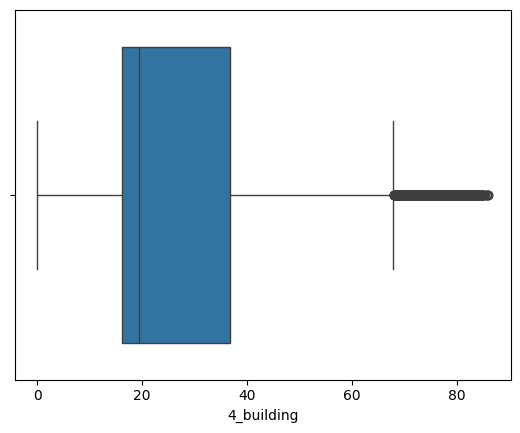

In [35]:
sns.boxplot(x="4_building",data=df)

## 5 building

<Axes: xlabel='5_building', ylabel='Count'>

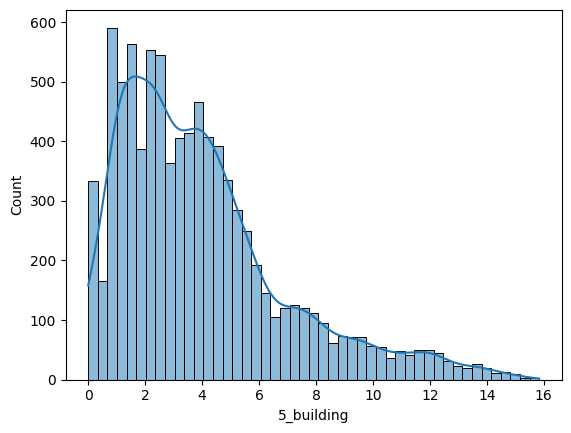

In [36]:
sns.histplot(x="5_building",kde=True,data=df)

In [37]:
q1=np.quantile(df["5_building"],0.25)
q3=np.quantile(df["5_building"],0.75)
iqr=q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
lower_bound,upper_bound

(-3.5638749999999995, 10.529125)

In [38]:
df[(df["5_building"] < lower_bound) | (df["5_building"] > upper_bound)]

,timestamp,bulk_consumption,1_building,2_building,3_building,4_building,5_building,6_building,7_building,leakage
131,06-01-2020 11:00,205.040,46.12950,22.152,1.643,35.822,13.039,37.72888,80.3125,0
132,06-01-2020 12:00,190.608,46.39250,14.808,2.389,42.252,11.062,49.13662,80.3125,0
133,06-01-2020 13:00,167.664,45.56625,17.834,1.906,41.216,11.280,44.24637,80.3125,0
154,07-01-2020 10:00,44.880,49.33975,8.834,1.394,56.272,12.024,64.91000,80.3125,0
155,07-01-2020 11:00,41.136,50.24300,20.105,1.845,69.555,13.227,81.49900,80.2500,0
...,...,...,...,...,...,...,...,...,...,...
5384,12-08-2020 08:00,120.112,27.76900,5.746,4.637,21.184,11.928,19.01225,0.0000,1
5385,12-08-2020 09:00,127.408,36.56300,0.000,6.245,21.128,11.743,20.09400,0.0000,1
5386,12-08-2020 10:00,103.824,36.33650,4.748,5.590,23.235,11.076,20.07700,0.0000,1
5504,17-08-2020 08:00,106.784,27.69650,3.265,4.677,21.276,11.817,19.32550,0.0000,1


<Axes: xlabel='5_building'>

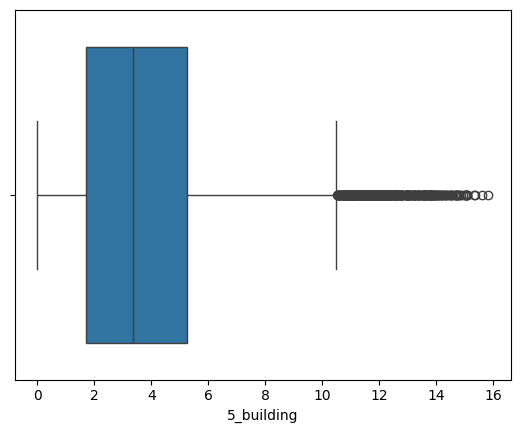

In [39]:
sns.boxplot(x="5_building",data=df)

## 6 building

<Axes: xlabel='6_building', ylabel='Count'>

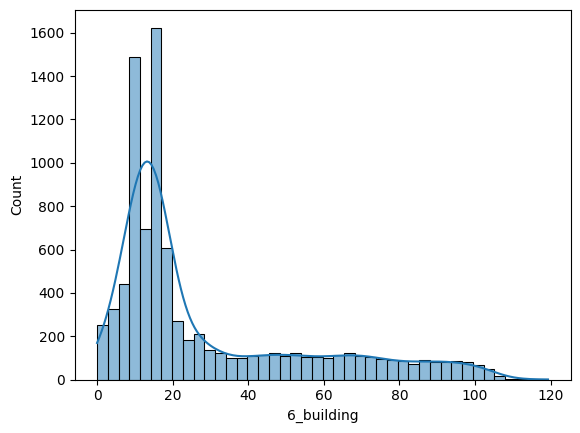

In [40]:
sns.histplot(x="6_building",kde=True,data=df)

In [41]:
q1=np.quantile(df["6_building"],0.25)
q3=np.quantile(df["6_building"],0.75)
iqr=q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
lower_bound,upper_bound

(-33.578875, 85.33812499999999)

In [42]:
df[(df["6_building"] < lower_bound) | (df["6_building"] > upper_bound)]

,timestamp,bulk_consumption,1_building,2_building,3_building,4_building,5_building,6_building,7_building,leakage
11,01-01-2020 11:00,0.000,48.31100,18.937,1.752,79.537,5.588,94.07300,80.31250,0
12,01-01-2020 12:00,0.000,51.48600,19.462,1.943,84.813,5.274,101.92800,80.31250,0
13,01-01-2020 13:00,0.000,51.57700,19.886,2.163,63.506,6.156,103.48700,80.31250,0
14,01-01-2020 14:00,15.968,52.19600,19.776,2.514,21.395,6.679,104.69400,80.25000,0
15,01-01-2020 15:00,3.552,46.08425,19.878,2.605,71.125,6.839,91.14075,80.31250,0
...,...,...,...,...,...,...,...,...,...,...
8749,30-12-2020 13:00,0.320,48.54650,6.986,2.061,76.039,1.435,92.77400,79.73439,0
8750,30-12-2020 14:00,0.000,48.62400,6.242,2.298,76.737,1.538,98.01900,80.17189,0
8751,30-12-2020 15:00,4.736,46.65900,6.235,2.334,72.472,1.571,91.90400,90.43751,0
8774,31-12-2020 14:00,0.000,49.79600,6.097,2.380,56.644,1.418,95.90300,81.54689,0


<Axes: xlabel='6_building'>

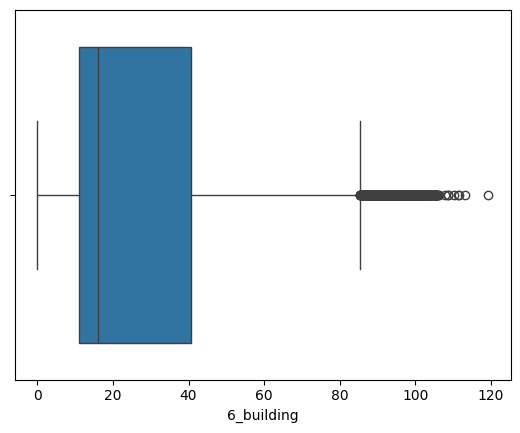

In [43]:
sns.boxplot(x="6_building",data=df)

## 7th building

<Axes: xlabel='7_building', ylabel='Count'>

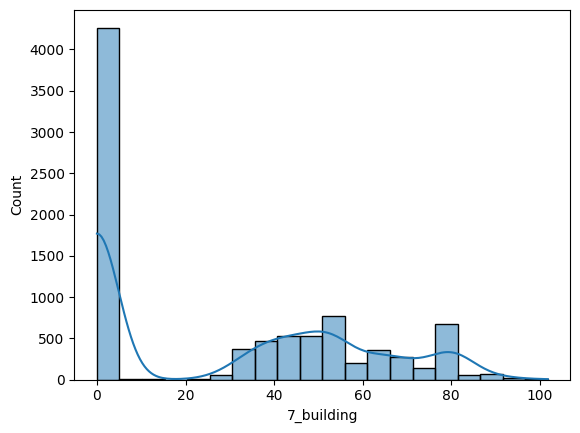

In [44]:
sns.histplot(x="7_building",kde=True,data=df)

In [45]:
q1=np.quantile(df["7_building"],0.25)
q3=np.quantile(df["7_building"],0.75)
iqr=q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
lower_bound,upper_bound

(-79.5, 132.5)

In [46]:
df[(df["7_building"] < lower_bound) | (df["7_building"] > upper_bound)]

,timestamp,bulk_consumption,1_building,2_building,3_building,4_building,5_building,6_building,7_building,leakage


<Axes: xlabel='7_building'>

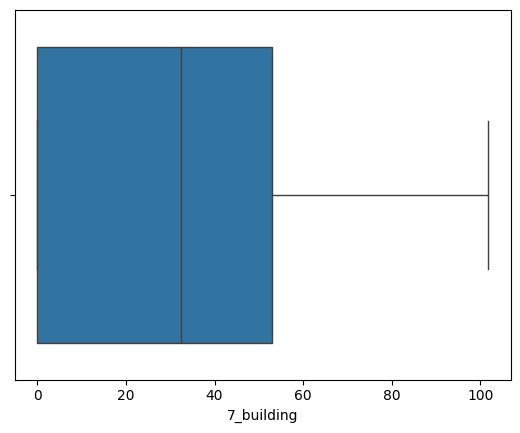

In [47]:
sns.boxplot(x="7_building",data=df)

## bulk consumption

<Axes: xlabel='bulk_consumption', ylabel='Count'>

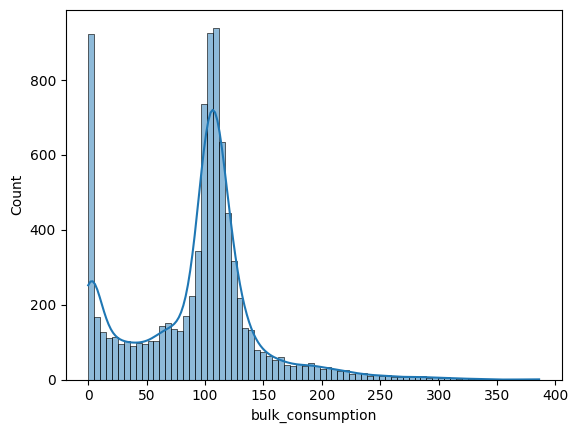

In [48]:
sns.histplot(x="bulk_consumption",kde=True,data=df)

In [49]:
q1=np.quantile(df["bulk_consumption"],0.25)
q3=np.quantile(df["bulk_consumption"],0.75)
iqr=q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
lower_bound,upper_bound

(-16.792, 195.496)

In [50]:
df[(df["bulk_consumption"] < lower_bound) | (df["bulk_consumption"] > upper_bound)]

,timestamp,bulk_consumption,1_building,2_building,3_building,4_building,5_building,6_building,7_building,leakage
39,02-01-2020 15:00,238.928,48.6690,18.983,2.733,78.368,7.314,96.71900,80.25000,0
40,02-01-2020 16:00,263.232,41.0125,18.781,2.687,65.538,7.241,81.83713,80.31250,0
41,02-01-2020 17:00,219.040,32.1915,19.066,1.666,52.764,7.493,74.23812,80.25000,0
42,02-01-2020 18:00,211.152,33.0205,19.005,1.583,32.925,7.148,74.82387,80.25000,0
53,03-01-2020 05:00,204.736,8.1250,9.415,1.373,14.038,3.140,6.42325,80.12500,1
...,...,...,...,...,...,...,...,...,...,...
8413,16-12-2020 13:00,246.240,68.8125,19.682,4.858,60.384,2.141,68.03200,93.24219,0
8414,16-12-2020 14:00,288.544,132.8540,20.176,4.030,43.281,2.205,41.65500,99.01563,0
8415,16-12-2020 15:00,277.696,136.4705,18.237,3.692,35.984,2.147,19.28225,92.50000,0
8416,16-12-2020 16:00,235.328,108.1370,18.084,3.081,37.502,2.252,20.45050,89.31251,0


<Axes: xlabel='bulk_consumption'>

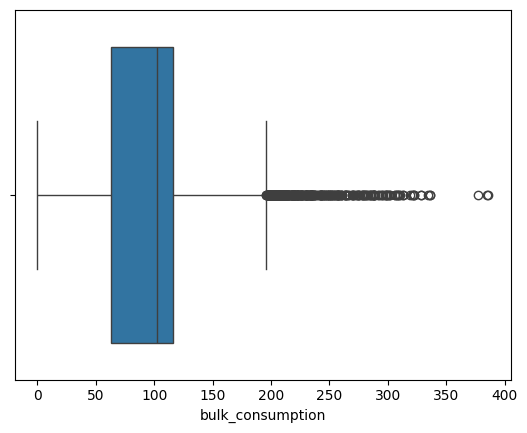

In [51]:
sns.boxplot(x="bulk_consumption",data=df)

## sampling

In [52]:
df["leakage"].value_counts()/len(df)

leakage
1    0.551685
0    0.448315
Name: count, dtype: float64

#### they are almost equal so,we donot need to do upsampling or downsampling using smote()

## Data model

In [53]:
x=df.drop(["timestamp","leakage"],axis=1)
y=df["leakage"]

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### RandomForestClassifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

In [56]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [57]:
y_predict=rf_classifier.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9823562891291975

### ExtraTreesClassifier

In [59]:
from sklearn.ensemble import ExtraTreesClassifier

In [60]:
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)
extra_trees_classifier.fit(x_train, y_train)

ExtraTreesClassifier(random_state=0)

In [61]:
y_pred = extra_trees_classifier.predict(x_test)

In [62]:
accuracy_score(y_test,y_pred)

0.9778030734206034

### GradientBoostingClassifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train, y_train)

GradientBoostingClassifier()

In [65]:
y_pred_grad = gb_classifier.predict(x_test)

In [66]:
accuracy_score(y_test,y_pred_grad)

0.981217985202049

## future prediction

In [67]:
x=pd.read_csv("bulk1_consumption_future_data.csv")

In [68]:
x.columns

Index(['1_building', '2_building', '3_building', '4_building', '5_building',
       '6_building', '7_building', 'bulk_consumption'],
      dtype='object')

In [69]:
x_train.columns

Index(['bulk_consumption', '1_building', '2_building', '3_building',
       '4_building', '5_building', '6_building', '7_building'],
      dtype='object')

In [70]:
features = x[['bulk_consumption', '1_building', '2_building', '3_building', '4_building', '5_building', '6_building', '7_building']]
predictions =rf_classifier.predict(features)
x["energy_leakage_predict"] = predictions

In [71]:
x.head()

,1_building,2_building,3_building,4_building,5_building,6_building,7_building,bulk_consumption,energy_leakage_predict
0,6.170516,7.129758,1.597402,17.805841,2.933322,13.304066,72.140540,72.736,0
1,2.261557,6.367443,1.007894,13.588334,2.132821,6.307017,71.551746,95.968,1
2,2.825597,7.134514,0.589585,13.915157,2.531670,10.934950,72.145947,93.824,0
3,3.834390,7.721507,0.454619,13.723915,2.804160,9.867526,73.382293,111.456,0
4,2.364617,9.646114,0.828339,14.519162,3.599407,10.662772,76.544129,109.952,0


In [72]:
x["energy_leakage_predict"].unique()

array([0, 1], dtype=int64)

In [73]:
x["energy_leakage_predict"].value_counts()

energy_leakage_predict
0    160
1      8
Name: count, dtype: int64

In [74]:
df=pd.read_csv(r"C:\workspace\smart energy\usecase\energy_leakage_classification\bulk1_consumption_future_data.csv")

In [76]:
df.to_json(orient="records")

'[{"1_building":6.170515508,"2_building":7.129757695,"3_building":1.597402451,"4_building":17.80584128,"5_building":2.933321654,"6_building":13.30406558,"7_building":72.14053953,"bulk_consumption":72.736},{"1_building":2.261556937,"2_building":6.367442512,"3_building":1.007893659,"4_building":13.58833374,"5_building":2.132820869,"6_building":6.307016666,"7_building":71.55174575,"bulk_consumption":95.968},{"1_building":2.825597172,"2_building":7.134513953,"3_building":0.589584872,"4_building":13.91515667,"5_building":2.531670217,"6_building":10.93494968,"7_building":72.14594723,"bulk_consumption":93.824},{"1_building":3.834389783,"2_building":7.721507296,"3_building":0.454619255,"4_building":13.72391507,"5_building":2.804159982,"6_building":9.867525752,"7_building":73.38229331,"bulk_consumption":111.456},{"1_building":2.364616596,"2_building":9.646114348,"3_building":0.828339044,"4_building":14.51916161,"5_building":3.59940652,"6_building":10.66277229,"7_building":76.54412935,"bulk_cons

In [77]:
from joblib import dump
dump(rf_classifier,"C:\workspace\smart energy\saved project\energy_leakage.joblib")

['C:\\workspace\\smart energy\\saved project\\energy_leakage.joblib']